In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')


import os
print(os.listdir("input"))
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))


['fruits-360']
fruits-360



In [42]:
np.random.seed(1234)
directory="input/fruits-360/Training/"
classes=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]


all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.resize(img_array,(img_size,img_size))
#         img_array= np.expand_dims((img_array)/255, axis=0).astype(np.float32)
        all_arrays.append([img_array,class_num])

In [43]:
directory2="input/fruits-360/Test/"
classes2=["Apple Golden 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Mango","Orange"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        img_array2=cv2.imread(os.path.join(path,img))
        img_array2=cv2.resize(img_array2,(img_size,img_size))
#         img_array2= np.expand_dims((img_array2)/255, axis=0).astype(np.float32)
        all_arrays2.append([img_array2,class_num2])

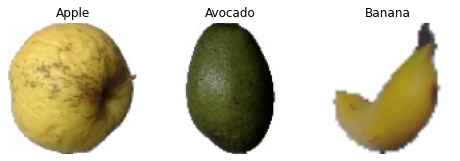

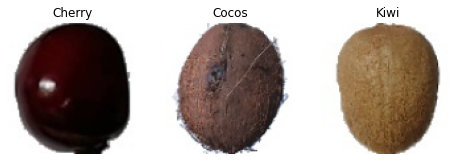

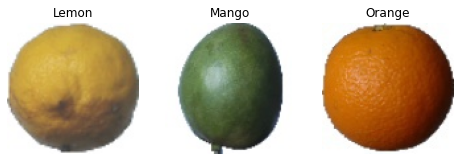

In [44]:
fruits_array_train=[]
for features,label in all_arrays:
    fruits_array_train.append(features)

location=[[1,500,1150],[1500,2000,2500],[3000,3500,4000]]
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
a=0
b=1
c=2
for i,j,k in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow((fruits_array_train[i])[...,::-1])
    plt.title(fruit_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow((fruits_array_train[j])[...,::-1])
    plt.title(fruit_names[b])
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow((fruits_array_train[k])[...,::-1])
    plt.title(fruit_names[c])
    plt.axis("off")
    a+=3
    b+=3
    c+=3

In [45]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying


In [46]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (4306, 100, 100, 3)
shape of X_test=   (1445, 100, 100, 3)


In [47]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=9)
Y_test=to_categorical(Y_test,num_classes=9)

In [48]:
from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [49]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tflite_support import flatbuffers
from tflite_support import metadata as _metadata
from tflite_support import metadata_schema_py_generated as _metadata_fb



# from keras.utils.np_utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
# from keras.optimizers import RMSprop,Adam
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(9,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=5
batch_size=36

In [50]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)


#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )


Epoch 1/5
95/95 [==============================] - 32s 332ms/step - loss: 0.3269 - accuracy: 0.2051 - val_loss: 0.2438 - val_accuracy: 0.5139
Epoch 2/5
95/95 [==============================] - 29s 301ms/step - loss: 0.2180 - accuracy: 0.4768 - val_loss: 0.1486 - val_accuracy: 0.7854
Epoch 3/5
95/95 [==============================] - 29s 301ms/step - loss: 0.1428 - accuracy: 0.6934 - val_loss: 0.1025 - val_accuracy: 0.7900
Epoch 4/5
95/95 [==============================] - 28s 299ms/step - loss: 0.1143 - accuracy: 0.7658 - val_loss: 0.0887 - val_accuracy: 0.8028
Epoch 5/5
95/95 [==============================] - 29s 305ms/step - loss: 0.0769 - accuracy: 0.8542 - val_loss: 0.0284 - val_accuracy: 0.9617


In [51]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the TF Lite model.
with tf.io.gfile.GFile('fruitmodel.tflite', 'wb') as f:
  f.write(tflite_model)

# Creates model info.
model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "Fruit image classifier"
model_meta.description = ("Identify fruits in the image")
model_meta.version = "v1"
model_meta.author = "Ruth"
model_meta.license = ("Apache License. Version 2.0 "
                      "http://www.apache.org/licenses/LICENSE-2.0.")
# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()
input_meta.name = "image"
input_meta.description = (
    "Input image to be classified. The expected image is {0} x {1}, with "
    "three channels (red, blue, and green) per pixel. Each value in the "
    "tensor is a single byte between 0 and 255.".format(160, 160))
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

# Creates output info.
output_meta = _metadata_fb.TensorMetadataT()
output_meta.name = "probability"
output_meta.description = "Probabilities of the labels respectively."
output_meta.content = _metadata_fb.ContentT()
output_meta.content.content_properties = _metadata_fb.FeaturePropertiesT()
output_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_stats = _metadata_fb.StatsT()
output_stats.max = [1.0]
output_stats.min = [0.0]
output_meta.stats = output_stats
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename("labels.txt")
label_file.description = "Labels for objects that the model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_AXIS_LABELS
output_meta.associatedFiles = [label_file]

# Creates subgraph info.
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [output_meta]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

populator = _metadata.MetadataPopulator.with_model_file('fruitmodel.tflite')
populator.load_metadata_buffer(metadata_buf)
populator.load_associated_files(["labels.txt"])
populator.populate()





In [52]:
# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter('fruitmodel.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[0.0000000e+00 3.7151966e-22 0.0000000e+00 1.0000000e+00 1.0599562e-15
  0.0000000e+00 0.0000000e+00 0.0000000e+00 2.1829387e-19]]


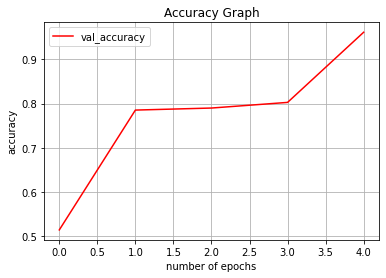

In [53]:
plt.plot(history.history["val_accuracy"],color="r",label="val_accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

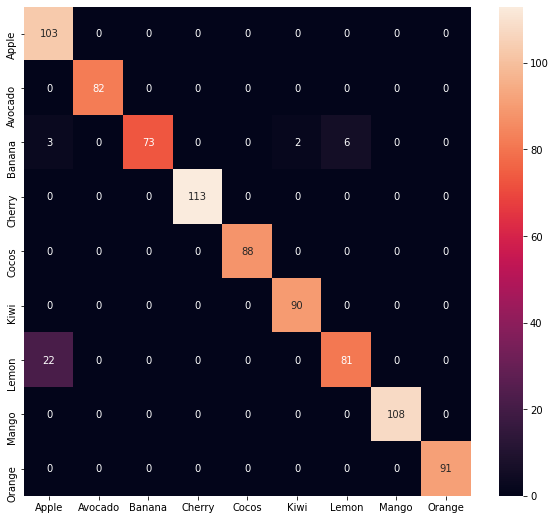

In [54]:
#confusion matrix
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()


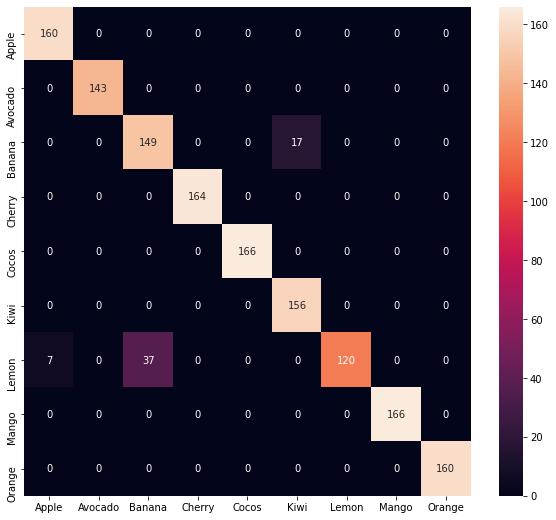

In [55]:
#confusion matrix
y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()